In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Small, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
train_path = '/content/drive/MyDrive/TrainTestValidationAugmented/train'
valid_path = '/content/drive/MyDrive/TrainTestValidationAugmented/val'
test_path = '/content/drive/MyDrive/TrainTestValidationSplitFinal/test'

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=6)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=6)

Found 1567 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV3Small(weights='imagenet', include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
x=Dense(128,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='sigmoid')(x)

model= Model(inputs = base_model.input, outputs=preds)


In [ ]:
model.summary()

NameError: ignored

In [ ]:
for layers in base_model.layers:
  layers.trainable = False

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.applications.mobilenet_v3 import MobileNetV3Small

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
epochs = 20

optimizer = Adam(learning_rate=.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
hist = model.fit(train_generator, validation_data=valid_generator, epochs=epochs, shuffle=True)

Epoch 1/20
157/157 [==============================] - 21s 65ms/step - loss: 0.3823 - accuracy: 0.8309 - val_loss: 0.2425 - val_accuracy: 0.8996
Epoch 2/20
157/157 [==============================] - 7s 43ms/step - loss: 0.1605 - accuracy: 0.9400 - val_loss: 0.2459 - val_accuracy: 0.8661
Epoch 3/20
157/157 [==============================] - 8s 51ms/step - loss: 0.0973 - accuracy: 0.9687 - val_loss: 0.2217 - val_accuracy: 0.8828
Epoch 4/20
157/157 [==============================] - 7s 43ms/step - loss: 0.0564 - accuracy: 0.9892 - val_loss: 0.2164 - val_accuracy: 0.8912
Epoch 5/20
157/157 [==============================] - 8s 50ms/step - loss: 0.0346 - accuracy: 0.9930 - val_loss: 0.2071 - val_accuracy: 0.8954
Epoch 6/20
157/157 [==============================] - 7s 42ms/step - loss: 0.0192 - accuracy: 0.9981 - val_loss: 0.2447 - val_accuracy: 0.8828
Epoch 7/20
157/157 [==============================] - 8s 51ms/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 0.2483 - val_accuracy: 0.870

In [ ]:
hist.history

{'loss': [0.4056990444660187,
  0.18217653036117554,
  0.10919207334518433,
  0.06702106446027756,
  0.043644342571496964,
  0.028425179421901703,
  0.015127555467188358,
  0.008679335005581379,
  0.004978606943041086,
  0.0033083546441048384,
  0.002405123319476843,
  0.001691225334070623,
  0.0012972744880244136,
  0.0010027854004874825,
  0.0008008879376575351,
  0.0006444042082875967,
  0.0005216920981183648,
  0.000429705367423594,
  0.00035884304088540375,
  0.0002998177660629153],
 'accuracy': [0.8174856305122375,
  0.9310784935951233,
  0.9661774039268494,
  0.9834077954292297,
  0.9910657405853271,
  0.9948946833610535,
  0.9980854988098145,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.2147257924079895,
  0.16964128613471985,
  0.19105692207813263,
  0.1770477443933487,
  0.1754046529531479,
  0.22247880697250366,
  0.21976426243782043,
  0.19048146903514862,
  0.2281043529510498,
  0.2247551828622818,
  0.21744142

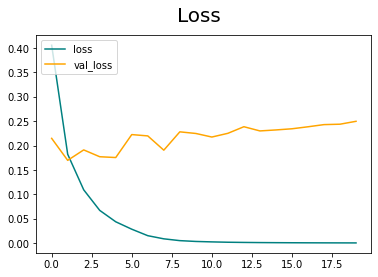

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

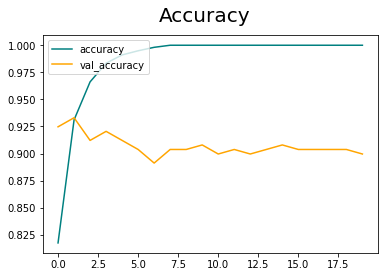

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','mobilenetv3.h5'))

In [ ]:
classes = {0: ('HZVFinal','herpes zoster'),
           1:('Monkeypox Images Phase 2' , 'mpox')}

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
model.evaluate

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x7f44a7df3d00>>

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/TrainTestValidationSplitFinal/test')

Found 58 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=6)
print("test loss, test acc:", results)


Evaluate on test data
10/10 [==============================] - 0s 35ms/step - loss: 0.2930 - accuracy: 0.9310
test loss, test acc: [0.29302018880844116, 0.931034505367279]


In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import os
path = '/content/drive/MyDrive/TrainTestValidationSplitFinal/test/HZVFinal/042017HB.jpg'

In [ ]:
import pandas as pd

In [ ]:
y_pred = model.predict(test_generator)
print(y_pred)

10/10 [==============================] - 11s 1s/step
[[8.2389897e-01 1.1248245e-01]
 [5.4691121e-02 7.6672542e-01]
 [1.6560367e-01 4.1143602e-01]
 [9.9865025e-01 5.3829467e-04]
 [4.3637955e-01 2.3520352e-01]
 [7.9242057e-01 8.0873862e-02]
 [9.9996507e-01 1.5008022e-05]
 [4.5717738e-06 9.9990284e-01]
 [1.2178394e-02 8.7332553e-01]
 [1.0407510e-04 9.9859744e-01]
 [9.9984956e-01 2.8845339e-05]
 [1.0000695e-05 9.9983013e-01]
 [1.1211837e-04 9.9872094e-01]
 [9.9974734e-01 1.1552595e-04]
 [9.9980122e-01 8.2995692e-05]
 [9.9373144e-01 5.3546252e-04]
 [1.3142073e-01 6.3098317e-01]
 [1.1078824e-02 9.6009552e-01]
 [2.9767025e-04 9.9740016e-01]
 [9.9220723e-01 3.3779186e-03]
 [2.1882549e-04 9.9730563e-01]
 [2.3420548e-04 9.9855310e-01]
 [3.3248403e-07 9.9999511e-01]
 [9.6701229e-01 1.4874357e-02]
 [9.9992359e-01 2.5693662e-05]
 [4.8990618e-04 9.8931712e-01]
 [9.8774695e-01 6.1514820e-03]
 [4.3377522e-02 7.7209657e-01]
 [3.3021274e-03 9.8426396e-01]
 [9.9818462e-01 7.3650817e-04]
 [9.8259097e-01 8

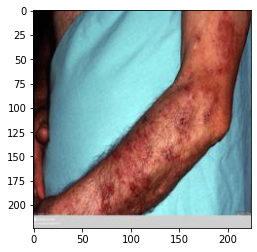

In [ ]:
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

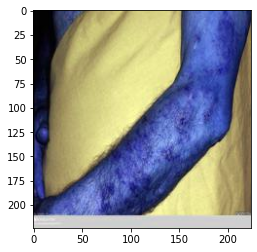

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 224, 224, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
yhat

array([[0.7991839 , 0.13080682]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is herpes zoster')
else:
    print(f'Predicted class is mpox')

ValueError: ignored

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

AttributeError: ignored

In [ ]:
test_path = '/content/drive/MyDrive/TrainTestValidationSplitFinal/test'
test = test_path
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test, target_size=(224,224), batch_size=6)

Found 58 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_path)

IndexError: ignored

In [ ]:
loss, accuracy = model.predict(test_dataset)
print('Test accuracy :', accuracy)

IndexError: ignored

In [ ]:
predictions = model.predict_classes(X_test)

AttributeError: ignored

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=cdc6f225282ce50e9026a6625072c3383971e294c64

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

st.set_option('deprication.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/resnet50.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # MpoxHerpesZosterID
         """
         )

file = st.file_uploader("Please upload an image file", type=["jpg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):

        size = (224,224)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image mostly a {} lesion with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.py


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2MbkqpiTonTes4EZbhskGn2QkuA_2Fhoj1GoxdgtEHP5QekQU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:

from pyngrok import ngrok
url=ngrok.connect(port=8051)
url


PyngrokNgrokHTTPError: ignored

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip


--2023-03-05 20:34:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.28M  4.97MB/s    in 2.7s    

2023-03-05 20:34:50 (4.97 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13921656/13921656]



In [ ]:

!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:80/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.8/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.124.240.78:8502

  Stopping...
  Stopping...


In [ ]:

get_ipython().system_raw('./ngrok http 80 &')


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: https://4260-34-124-240-78.ngrok.io


In [ ]:
!ngrok authtoken 2MbkqpiTonTes4EZbhskGn2QkuA_2Fhoj1GoxdgtEHP5QekQU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:

!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [ ]:
!streamlit run --server.port 80 app.py >/dev/null



In [ ]:

from pyngrok import ngrok
url=ngrok.connect(port=80)
url


PyngrokNgrokHTTPError: ignored

In [ ]:
!ngrok http -host-header=launch.local 80

Your account is limited to 1 simultaneous ngrok agent session.
Active ngrok agent sessions in region 'us':
  - ts_2MbtTRjS7i0wyz1EAXBmggQzp6d (34.124.240.78)

ERR_NGROK_108



In [ ]:

!cat /content/nohup.out




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.240.78:8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.124.240.78:8502




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8503
  External URL: http://34.124.240.78:8503

  Stopping...
  Stopping...
  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.240.78:8501

  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.240.78:8501

  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.240.78:8501

  Stopping...



  You can now view your Streamlit app in your browser.

  Network U

In [ ]:


!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.240.78:8501

  Stopping...
  Stopping...
